# ¿Qué es una serie temporal?

https://es.wikipedia.org/wiki/Serie_temporal

## Entender el concepto de intervalos de tiempo

Estudio de la frecuencia (intervalos) donde los datos serán recolectados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Pandas DateTime Range

```
pd.date_range(start, end, periods, freq)

```

In [2]:
# El rando de DateTime Range de Pandas
pd.date_range("20/11/2021", periods=7, freq="D")

DatetimeIndex(['2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26'],
              dtype='datetime64[ns]', freq='D')

### Los aliases de frecuencias 

- "D" : Day
- "W" : Week
- "H" : Hour
- "T": Minutes
- "S": Seconds
- "L": Milisecond

El resto https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [3]:
# Trabajamos con start , end
pd.date_range("20/11/2021", "31/01/2022", periods=8)

DatetimeIndex([          '2021-11-20 00:00:00',
               '2021-11-30 06:51:25.714285714',
               '2021-12-10 13:42:51.428571428',
               '2021-12-20 20:34:17.142857143',
               '2021-12-31 03:25:42.857142857',
               '2022-01-10 10:17:08.571428571',
               '2022-01-20 17:08:34.285714286',
                         '2022-01-31 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [16]:
dates = pd.date_range("18/02/2021", "18/03/2021", periods=29)
freq = pd.infer_freq(dates)

In [17]:
print(freq)

D


In [18]:
dates

DatetimeIndex(['2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18'],
              dtype='datetime64[ns]', freq=None)

In [19]:
len(dates)

29

In [24]:
dates = pd.date_range("18/11/2021", "18/12/2021", periods=28)
freq = pd.infer_freq(dates)

In [25]:
print(freq)

1600T


In [26]:
# Estructura en formato DataFrame
df = pd.DataFrame(index=dates)
df['values'] = np.random.randint(500, 3000, len(dates))
df.head()

,values
2021-11-18 00:00:00,1107
2021-11-19 02:40:00,2207
2021-11-20 05:20:00,1443
2021-11-21 08:00:00,2034
2021-11-22 10:40:00,2739


In [27]:
df.shape

(28, 1)

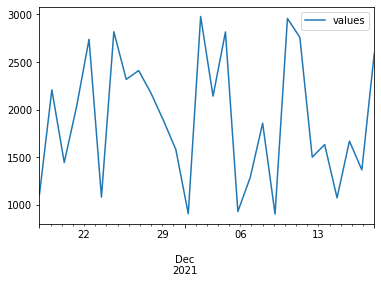

In [28]:
df.plot()

In [29]:
# Lectura desde un csv o SQL (normalmente son en formato STRING)
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv")
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [32]:
df.shape

(204, 2)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


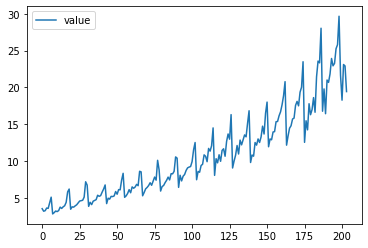

In [31]:
df.plot()

Observamos que la columna fecha no está tratada como tal, sino como `object`. 
Pintando en el gráfico vemos que el eje X es el propio índice.

In [43]:
# Podemos tratar la fecha desde el DataFrame
df_1 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",
                  parse_dates=['date'] )
df_1.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [44]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [45]:
# La otra forma es convertir a índice el formato date
df.index = pd.to_datetime(df['date'])
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [47]:
df.index.freq = pd.infer_freq(df.index)
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq='MS')

In [48]:
df.head()

,date,value
date,,
1991-07-01,1991-07-01,3.526591
1991-08-01,1991-08-01,3.180891
1991-09-01,1991-09-01,3.252221
1991-10-01,1991-10-01,3.611003
1991-11-01,1991-11-01,3.565869


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Freq: MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.8+ KB


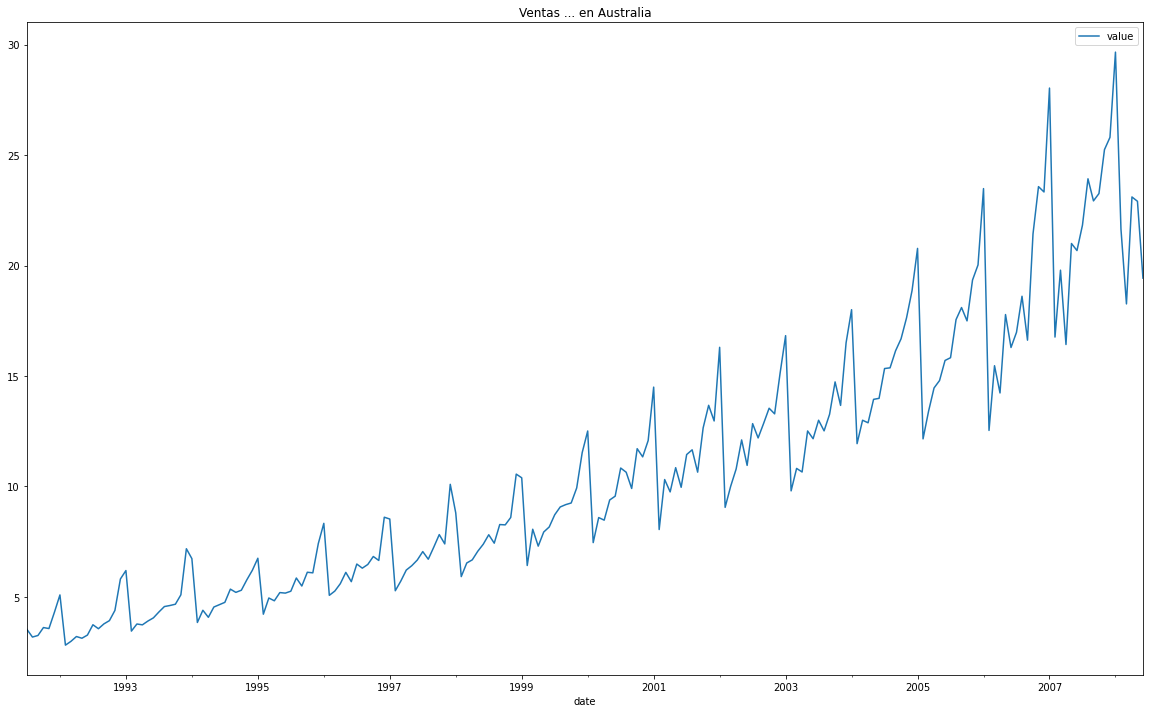

In [50]:
df.plot(figsize=(20,12), title="Ventas ... en Australia")

In [51]:
df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


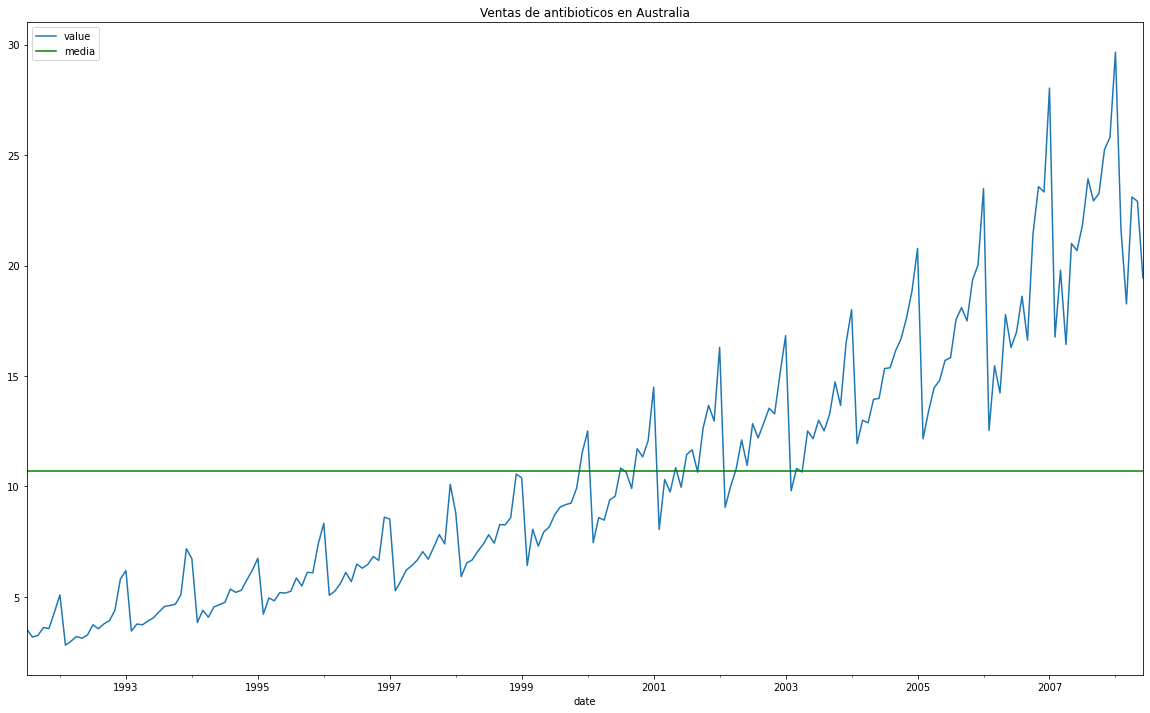

In [52]:
# Si deseamos pintar la media a lo largo del tiempo
df.plot(figsize=(20,12))
plt.title("Ventas de antibioticos en Australia")
plt.axhline(df.value.mean(), c='g', label="media")
plt.legend()

### Entendemos el concepto de Media móvil - Moving Average

**Rolling Windows**

La media de todos los valores no aportan mucho, pero es interesante estudiar la media móvil a lo largo del tiempo.

In [53]:
df.rolling(window=12)

Rolling [window=12,center=False,axis=0]

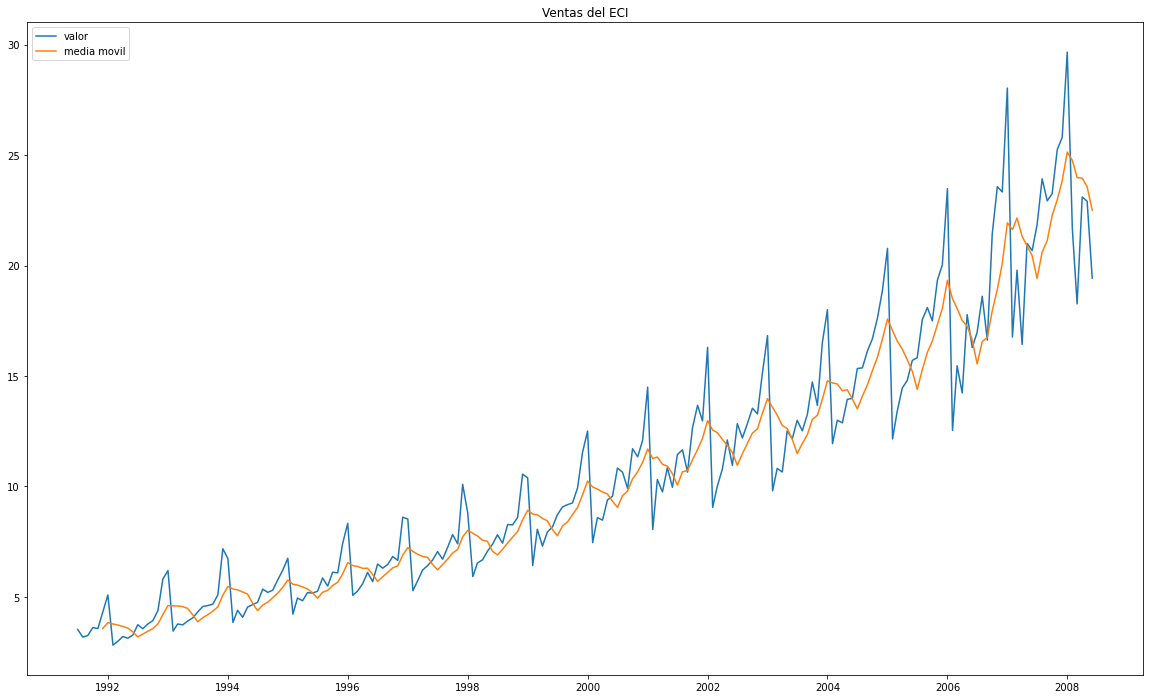

In [61]:
# Representación gráfica de la media móvil
plt.figure(figsize=(20,12))
plt.title("Ventas del ECI")

plt.plot(df['value'], label='valor')
#plt.axhline(df.value.mean(), c='g', label="media")

# Utilizamos la media móvil
plt.plot(df.rolling(window=6).mean(), label="media movil")
plt.legend()

![](https://i.stack.imgur.com/Xd62a.png)

## Descomponer los factores de la serie temporal

Tenemos 4 componentes principales#

- **Trend**

La fluctuación de la media a lo largo del tiempo, en el ejemplo anterior es creciente. No siempre tenemos una tendencia, positiva o negativa, podría ser constante. Determina la tendencia, el componente - estacionalidad -

- **Seasonality**

Determina los picos repetidos a lo largo del tiempo. Puede ser diario, semanal, semestral, anual.

- **Cycles**

Son los patrones repetidos en un determinado intervalo (o el caso contrario pueda que no tenga ninguna relación). En genearl, tenemos en largos intervalos, una amplitud mayor de esta variación. Importante, es complejo el estudio de las predicciones basadas en estacionalidad y ciclos, de norma general, los datos reales, influyen muchos factores.

- **Residuales**

Es la variación del ruido respecto a los patrones.


In [63]:
# Trabajamos ahora con la descomposición de los componentes
from statsmodels.tsa.seasonal import seasonal_decompose

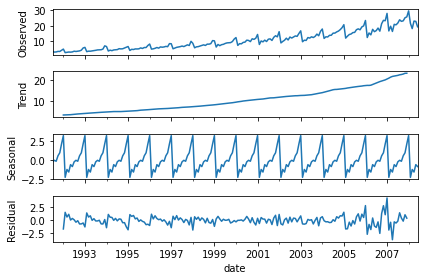

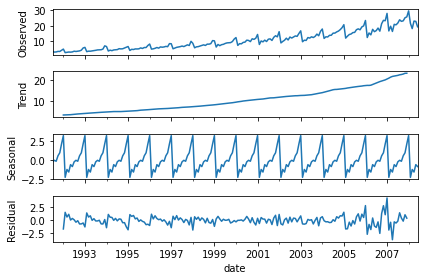

In [64]:
res = seasonal_decompose(df.value, model="additive")
res.plot()

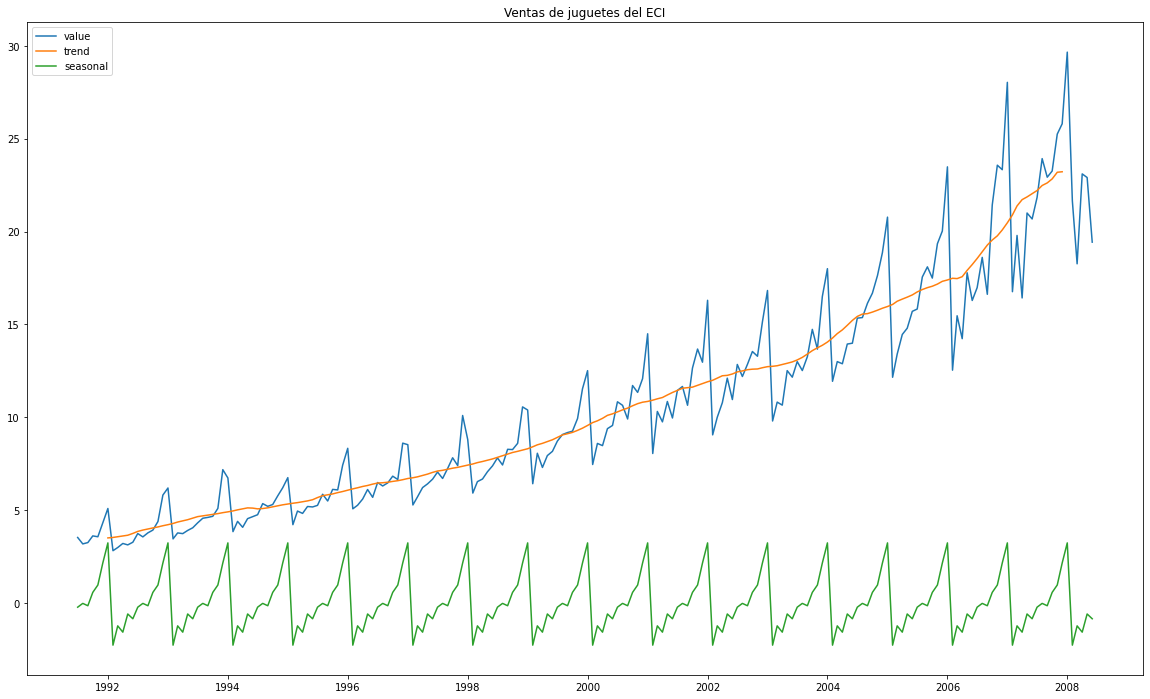

In [65]:
# Representación gráfica sobre el dataset original
plt.figure(figsize=(20,12))
plt.title("Ventas de juguetes del ECI")
plt.plot(df.value, label='value')
plt.plot(res.trend, label='trend')
plt.plot(res.seasonal, label='seasonal')
plt.legend()

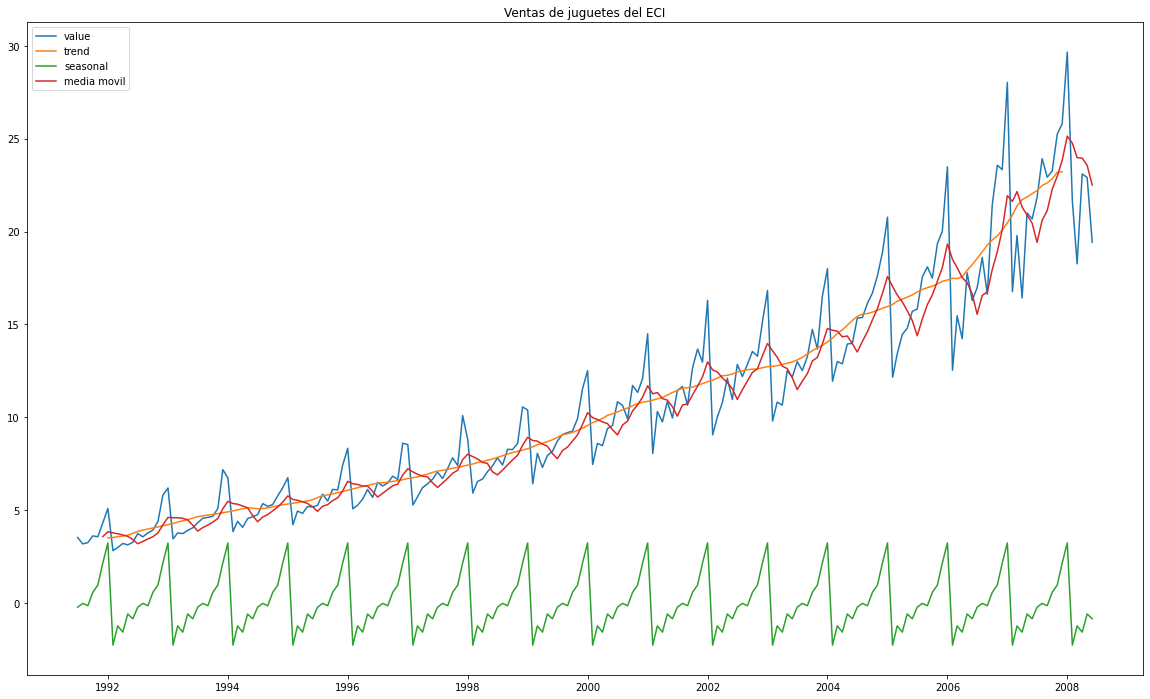

In [66]:
# Representación gráfica sobre el dataset original añadiendo media móvil
plt.figure(figsize=(20,12))
plt.title("Ventas de juguetes del ECI")
plt.plot(df.value, label='value')
plt.plot(res.trend, label='trend')
plt.plot(res.seasonal, label='seasonal')

# Utilizamos la media móvil
plt.plot(df.rolling(window=6).mean(), label="media movil")
plt.legend()

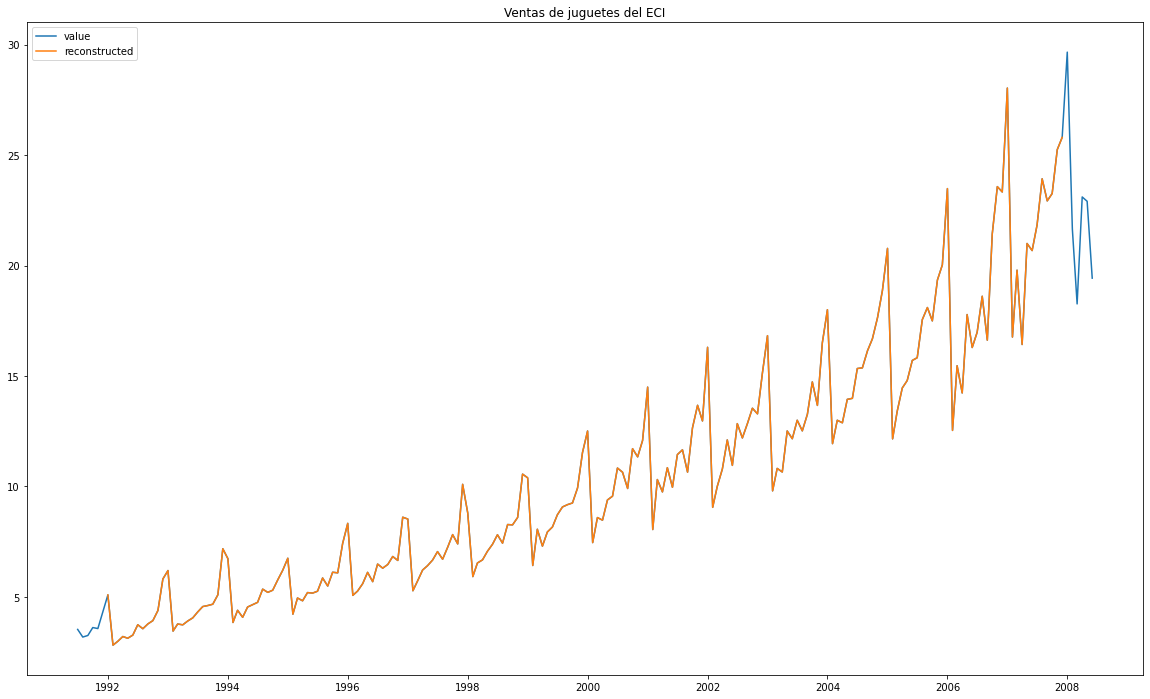

In [67]:
# La componente additive del modelo construye la base de la predicción de la serie temporal
plt.figure(figsize=(20,12))
plt.title("Ventas de juguetes del ECI")
plt.plot(df.value, label='value')
# plt.plot(res.trend, label='trend')
# plt.plot(res.seasonal, label='seasonal')
plt.plot(res.trend + res.seasonal + res.resid, label="reconstructed")
plt.legend()

## Analísis de la estacionalidad y ciclos

In [68]:
# Creamos vectores aleatorios
x = np.linspace(0,8*np.pi, 49)
# np.sin coge el ángulo en radianes
# 360º == 2pi rad
y = np.sin(x) + 1

In [69]:
sin = pd.DataFrame(y, index=pd.date_range("01/01/2021", periods=49, freq="MS"))

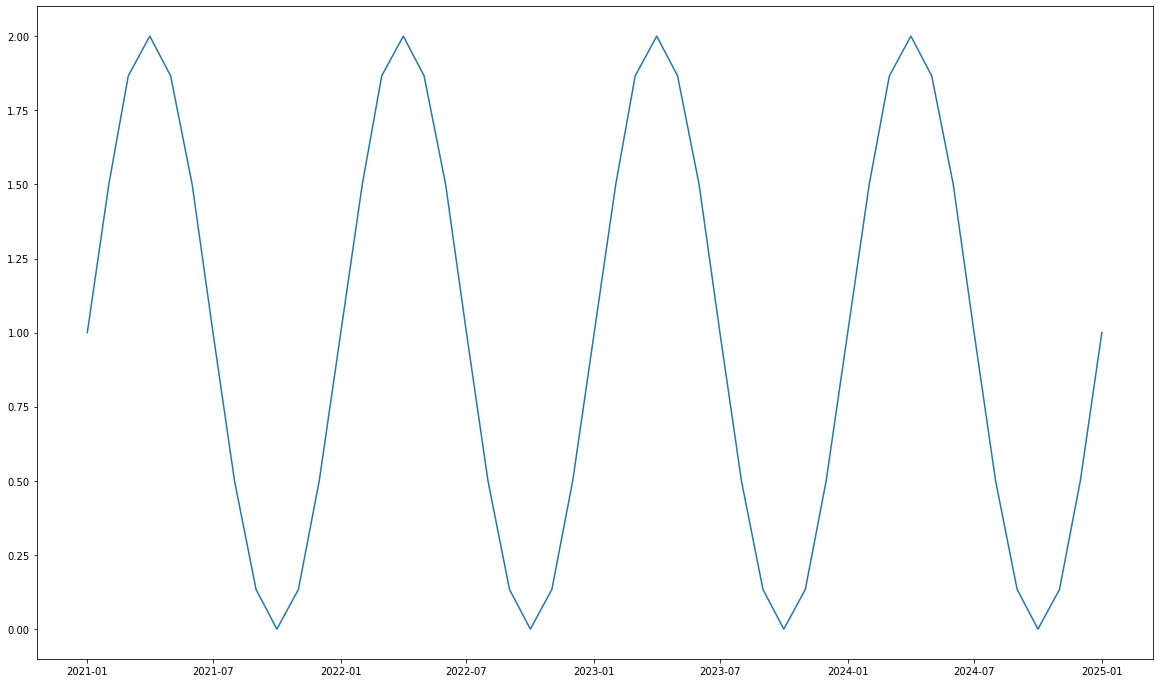

In [70]:
plt.figure(figsize=(20,12))
plt.plot(sin)

In [71]:
sin.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01'],
              dtype='datetime64[ns]', freq='MS')

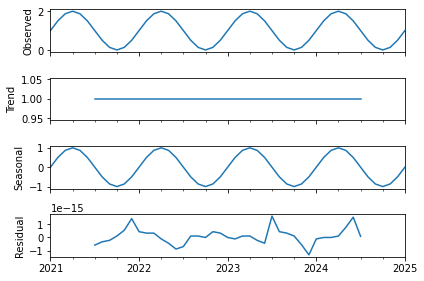

In [73]:
# descomposición de la componente seasonal
seasonal_decompose(sin).plot();

- **stationarity**

Es una media constante en el tiempo (no es la tendencia). \\
La varianza es constante.

- **weakly stationarity** 

No tenemos tendencia.  \\
Varianza no es constante

- **Non-Stationarity**

Es una tendencia, incremental o decremental

A veces, ocurre que no es clara nuestro análisis o que el estudio de la estacionalidad y tendencia es confusa. No sabemos que valor de "stationarity" aplicar.

## Augmented Dickey Fuller test

Aplicamos el test de hipótesis, con el test estadístico, tenemos la hipótesis nula y la alternativa.

- $H_0$ - Null Hypotesis: Esta serie **no** es estacionario y tiene una tendencia significativa.

- $H_A$ - Alternative Hypotesis: Esta serie es estacionaria.

In [74]:
# Aplicamos el test estadístico
from statsmodels.tsa.stattools import adfuller
res = adfuller(df.value)
res

(3.145185689306741,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '10%': -2.5750324547306476,
  '5%': -2.8770397560752436},
 549.6705685364174)

In [75]:
# Descomponiendo el resultado del test estadístico
adf, pvalue, usedlag, nobs, critical_values, icbest = res

In [76]:
# El valor t-test
adf

3.145185689306741

In [77]:
# Los valores críticos según el intervalo de confianza (99%, 95%, 90%)
critical_values

{'1%': -3.465620397124192,
 '10%': -2.5750324547306476,
 '5%': -2.8770397560752436}

In [83]:
# res = adfuller(sin)
# res

 El resultado

```
 (-27153662497.998405,
 0.0,
 3,
 361,
 {'1%': -3.4485948978753314,
  '5%': -2.86957971128312,
  '10%': -2.571053050314224},
 -18257.744749529465)
 ```


 No podemos rechazar la hipótesis nula, dado que "adf" es grande respecto a cualquier valor crítico.

 Si observamos el nivel de confianza del 1% , podemos afirmar que los datos no son estacionarios. Alternativamente, si observamos el p-value y comparamos con los valores del intervalo de confianza (5%), observamos:

 - si p_value > alpha(0.05), no podemos rechazar la hipótesis nula.


## ARIMA (Auto Regressive Integrated Moving Average)

https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

Es poder aplicar nuestras caractéristicas diferenciales a los datos antes de aplicarlos al modelo.

Si desde ARIMA, sacamos 3 componentes para la función:

$f = (p, d, q)$

#### AR, I, MA

- **AR(p) - Partial AutoCorrelation Function**

Es la representación de n residuales fuera de la zona crítica

- **I(d)**
La diferenciación, se refiere a la diferencia entre los valores de la serie que origina la estacionalidad.

- **MA(q)**
Representa la función de autocorrelación

## Aplicamos la función paso a paso [Práctica]

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Librerías científicas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [85]:
# Cargamos los datos
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",
                 parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


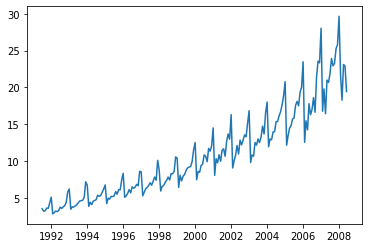

In [86]:
plt.plot(df)

In [87]:
df.shape

(204, 1)

In [88]:
y_test = df['value'][-15:]
y_train = df['value'][:-15]

In [89]:
y_test, y_train

(date
 2007-04-01    16.427305
 2007-05-01    21.000742
 2007-06-01    20.681002
 2007-07-01    21.834890
 2007-08-01    23.930204
 2007-09-01    22.930357
 2007-10-01    23.263340
 2007-11-01    25.250030
 2007-12-01    25.806090
 2008-01-01    29.665356
 2008-02-01    21.654285
 2008-03-01    18.264945
 2008-04-01    23.107677
 2008-05-01    22.912510
 2008-06-01    19.431740
 Name: value, dtype: float64, date
 1991-07-01     3.526591
 1991-08-01     3.180891
 1991-09-01     3.252221
 1991-10-01     3.611003
 1991-11-01     3.565869
                 ...    
 2006-11-01    23.575517
 2006-12-01    23.334206
 2007-01-01    28.038383
 2007-02-01    16.763869
 2007-03-01    19.792754
 Name: value, Length: 189, dtype: float64)

In [90]:
# Aplicamos el test de Dickey Fuller
adfuller(y_train)

(2.9655893274570984,
 1.0,
 14,
 174,
 {'1%': -3.4685016947910636,
  '10%': -2.57570415906989,
  '5%': -2.8782983668563396},
 407.9146036218434)

### Calculando AR(p) - Auto Regressive

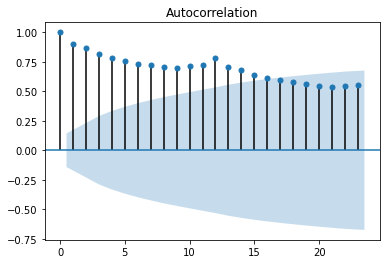

In [92]:
# Representación de nuestra auto-correlación
plot_acf(y_train);

función de ARIMA:

- $f=(p,d,q)

### Calculando **I(d)** Differencing

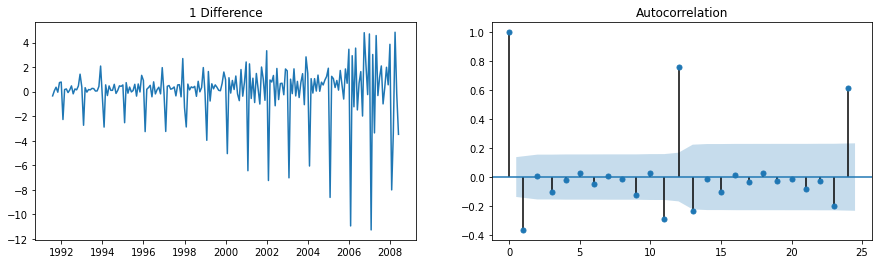

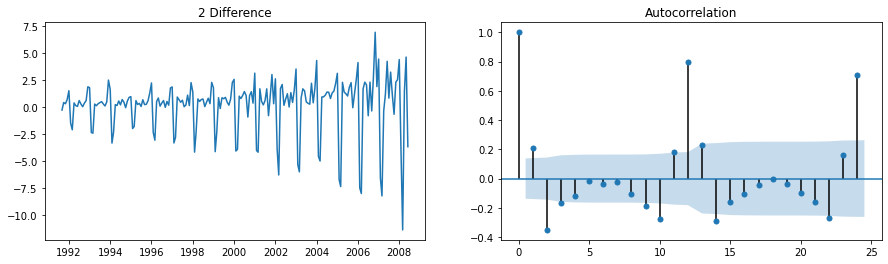

In [93]:
for i in range(1,3):
  diff = df['value'].diff(i)[i:]
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  plt.plot(diff)
  plt.title(f"{i} Difference")
  ax = plt.subplot(1,2,2)
  plot_acf(diff, ax=ax)

Por tanto:

- Un modelo sin órdenes de diferenciación supone que la serie original es estacionaria.

- Un modelo con un orden de diferenciación supone que la serie original tiene una tendencia promedio constante.

- Un modelo con dos órdenes de diferenciación total supone que la serie original tiene una tendencia variable en el tiempo.

En nuestro caso aplica que `d=2`

In [94]:
data = df['value'].diff(2)[2:]

# Notaremos que nuestro resultado será weakly stationarity
adfuller(data)

(-2.495462835295015,
 0.11658217250241365,
 14,
 187,
 {'1%': -3.465811691080702,
  '10%': -2.5750770662586864,
  '5%': -2.877123351472649},
 542.6208199775966)

## Calculado el MA(q) - Moving Average

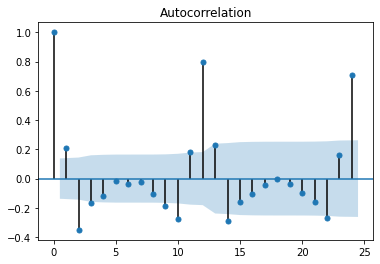

In [96]:
plot_acf(data);

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


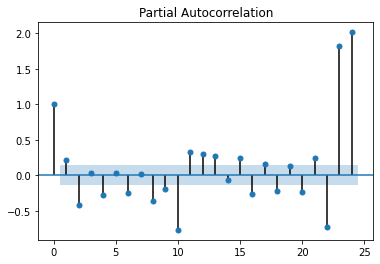

In [98]:
# Aplicando nuevamente AR(p) - Partial Auto-Correlation
plot_pacf(data);

Dado que usamos la autocorrelación parcial (después de la diferenciación) para elegir qué orden utilizar:

- visto que tenemos d=2, y superan el límite de significaciòn, decimos que p=2

- observamos que lo mismo sucede con el cálculo de AR(p) que los valores de correlaciones son -24 y -12, por tanto es un valor GRANDE.

- Indicamos entonces que la componente estacional es muy fuerte.

## Calculando el modelo ARIMA

Ahora que tenemos las 3 componentes, crearemos el modelo.

In [99]:
# Sabiendo que d=2, y p=2, y q=2
order = (2,2,2)
arima = ARIMA(y_train, order=order, freq='MS')
arima;

In [100]:
arima = arima.fit()

In [111]:
# Aplicamos la predicción (el primer punto predicho, con el último punto predicho)
y_pred = arima.predict(len(y_train), len(y_train)+14)

In [112]:
arima.predict()

1991-09-01     0.000674
1991-10-01    -0.256423
1991-11-01    -0.439163
1991-12-01     0.060393
1992-01-01    -0.819280
                ...    
2006-11-01    -6.734475
2006-12-01    -5.290386
2007-01-01    -2.503108
2007-02-01   -10.708356
2007-03-01    13.753258
Freq: MS, Length: 187, dtype: float64

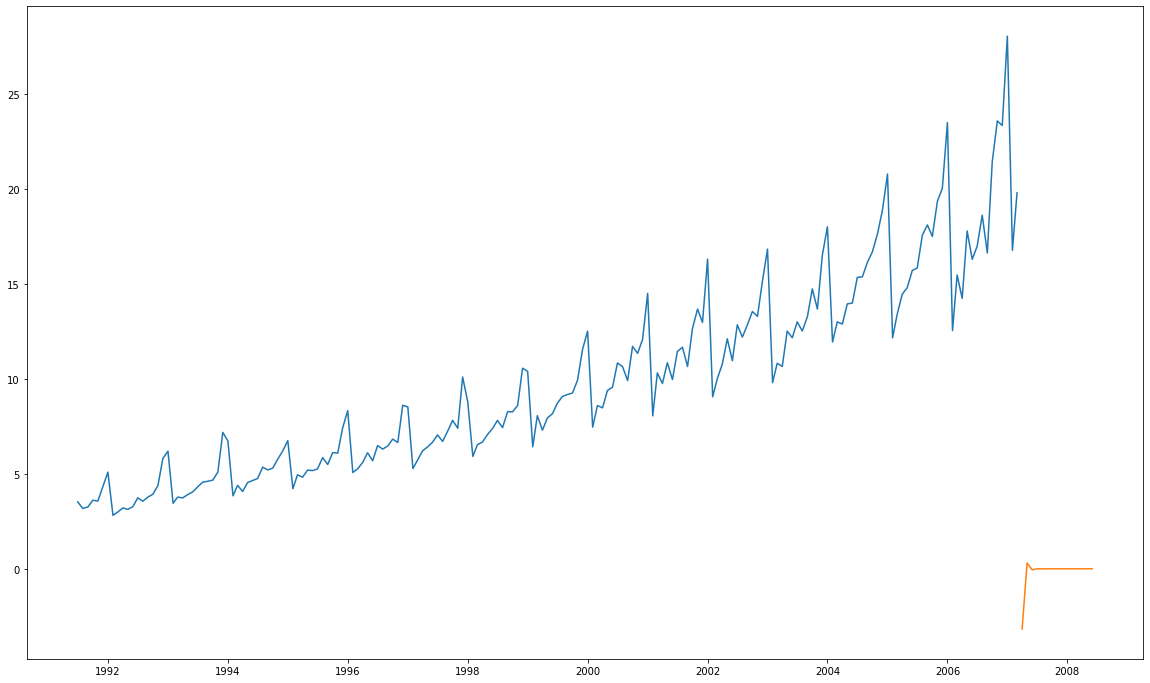

In [113]:
plt.figure(figsize=(20,12))
plt.plot(y_train)
plt.plot(y_pred)

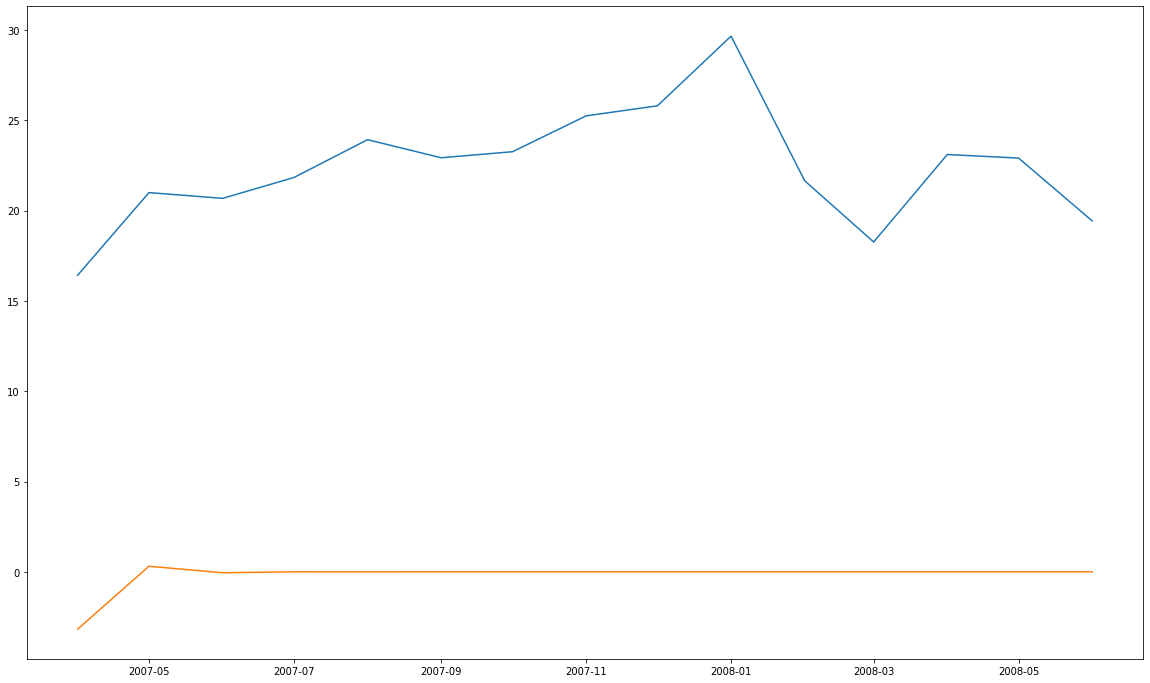

In [114]:
plt.figure(figsize=(20,12))
plt.plot(y_test)
plt.plot(y_pred)

In [115]:
mean_squared_error(y_pred, y_test)

518.7506884312719

In [118]:
# Si aplicaríamos los valores p,d,q (10,2,12)
orden = (10,2,12)
arima = ARIMA(y_train, order=orden, freq='MS')

In [119]:
arima = arima.fit()
y_pred = arima.predict(len(y_train), len(y_train)+14)
plt.plot(y_train)
plt.plot(y_pred)

ValueError: ignored